# IMPORT LIBRARY

In [2]:
import pandas as apis #untuk memenipulasi data
import numpy as np #Untuk operasi numerik
import matplotlib.pyplot as plt #Untuk Visualisasi dan grafik data

In [3]:
#Membaca data CSV menggunakan pandas
apis = apis.read_csv("District_Wise_Mental_Health_Patients_2021-22.csv")
#menampilkan data
apis

,SL No,DISTRICT,SEVERE_MENTAL_DISORDER_(SMD),COMMON_MENTAL _DISORDER(CMD),ALCOHOL_&_SUBSTANCE_ABUSE,CASES_REFERRED_TO_HIGHER_CENTRES,SUICIDE_ATTEMPT_CASES,Others,Total
0,1,BAGALKOTE,1479,2936,55,13,39,5804,10326
1,2,BANGALORE RURAL,767,1856,302,437,6,2916,6284
2,3,BANGALORE URBAN,6943,17672,1352,513,558,8417,35308
3,4,BELGAUM,4595,6642,1870,420,200,13684,27411
4,5,BELLARY,4861,13340,2601,27,694,12070,33593
5,6,BIDAR,628,661,719,215,6,493,2722
6,7,BIJAPUR,826,727,146,1,0,3283,4983
7,8,CHAMRAJNAGAR,3929,5215,506,24,13,7850,17537
8,9,CHIKKABALLAPUR,3146,6549,2921,127,536,9559,22838
9,10,CHIKMAGALUR,1764,1520,302,486,0,1999,6071


# MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT X

In [4]:
#Mengambil hanya kolom "SEVERE_MENTAL_DISORDER_(SMD)" dan "SUICIDE_ATTEMPT_CASES" dari data 
apis = apis[["SEVERE_MENTAL_DISORDER_(SMD)", "SUICIDE_ATTEMPT_CASES"]] 
#SEVERE_MENTAL_DISORDER_(SMD)=x1; SUICIDE_ATTEMPT_CASES=x2

apis.head(10) #Menampilkan 10 baris pertama data

,SEVERE_MENTAL_DISORDER_(SMD),SUICIDE_ATTEMPT_CASES
0,1479,39
1,767,6
2,6943,558
3,4595,200
4,4861,694
5,628,6
6,826,0
7,3929,13
8,3146,536
9,1764,0


# MELIHAT RINGKASAN STATISTIK 

In [5]:
apis.describe() #Menampilkan deskripsi dari data 

,SEVERE_MENTAL_DISORDER_(SMD),SUICIDE_ATTEMPT_CASES
count,30.000000,30.000000
mean,2673.533333,220.666667
std,1990.417020,271.403928
min,502.000000,0.000000
25%,1298.250000,23.750000
50%,2434.500000,110.500000
75%,3279.500000,299.000000
max,9208.000000,881.000000


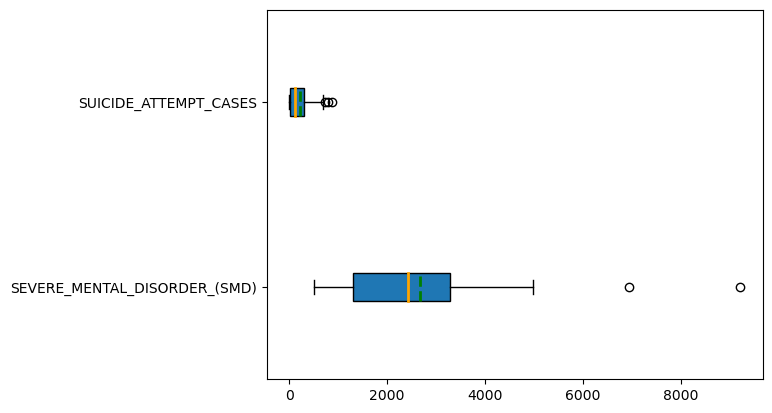

In [6]:
#Membuat subplot
fig, ax = plt.subplots()
#Membuat boxplot dengan menampilkan rata-rata, 
#garis median, dan warna yang ditentukan
ax.boxplot(apis,
          vert = False, #mengatur orientasi boxplot menjadi horizontal
          showmeans = True, #menunjukkan garis rata-rata
          meanline = True, #menunjukkan garis rata-rata sebagai garis terpisah
          labels = ("SEVERE_MENTAL_DISORDER_(SMD)", "SUICIDE_ATTEMPT_CASES"),
          patch_artist = True, #mengizinkan kotak untuk diisi warna
          medianprops = {"linewidth" : 2, "color" : "orange"}, #warna garis median
          meanprops = {"linewidth" : 2, "color" : "green"}) #warna garis rata-rata
# Menampilkan boxplot
plt.show()

# BUANG OUTLIER

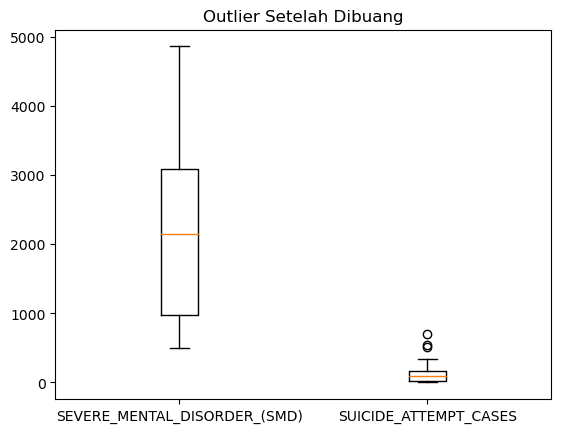

In [7]:
#Q1, Q3, dan IQR
kolom = ["SEVERE_MENTAL_DISORDER_(SMD)", "SUICIDE_ATTEMPT_CASES"]

Q1 = apis[kolom].quantile(0.25)
Q3 = apis[kolom].quantile(0.75)
IQR = Q3-Q1
#Menghitung kuartil pertama,kuartil ketiga,jangkauan antarkuartil
apis = apis[~((apis[kolom]<(Q1 - 1.5 * IQR)) |
              (apis[kolom]>(Q3 + 1.5 *IQR))).any(axis = 1)]
#Menghapus outlier dari data menggunakan metode IQR
plt.boxplot(apis[kolom])
plt.xticks([1,2], kolom)
plt.title("Outlier Setelah Dibuang")
plt.show()
#Menampilkan boxplot setelah penghapusan outlier

In [8]:
#Menampilkan ringkasan statistik dari data 
#setelah penghapusan outlier
apis.describe()

,SEVERE_MENTAL_DISORDER_(SMD),SUICIDE_ATTEMPT_CASES
count,26.000000,26.000000
mean,2223.653846,140.615385
std,1286.829653,182.224933
min,502.000000,0.000000
25%,971.250000,21.500000
50%,2149.000000,98.000000
75%,3084.500000,162.250000
max,4861.000000,694.000000


In [9]:
#Menampilkan informasi tentang dataset
apis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   SEVERE_MENTAL_DISORDER_(SMD)  26 non-null     int64
 1   SUICIDE_ATTEMPT_CASES         26 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


# MEMBUAT NILAI X

In [10]:
#Mengonversi dataset menjadi array numpy
x_array = np.array(apis)

# VISUALISASI PERSEBARAN DATA

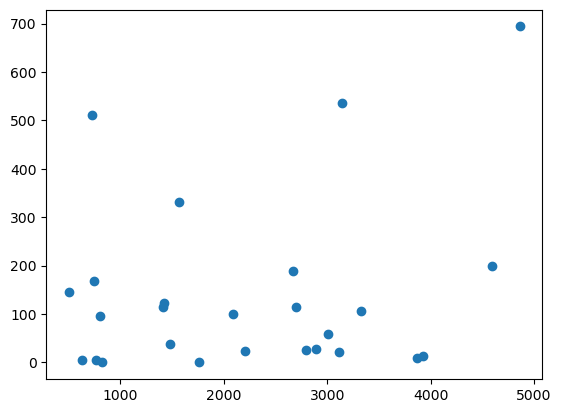

In [11]:
plt.scatter(apis['SEVERE_MENTAL_DISORDER_(SMD)'], apis['SUICIDE_ATTEMPT_CASES'])
plt.show()


# STANDARISASI

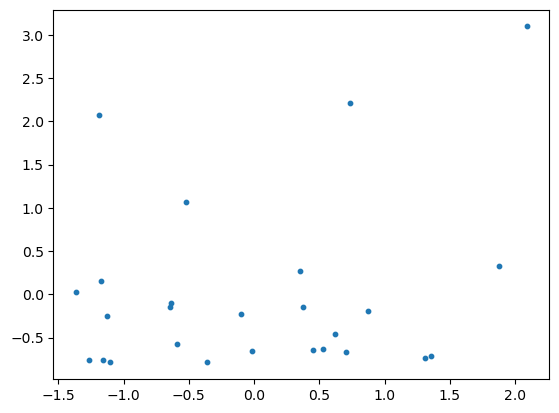

In [12]:
#Melakukan standarisasi fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
#Menampilkan scatter plot dari data yang telah distandarisasi
plt.show()

# CEK SUM OF SQUARE ERROR DARI TIAP PEMBAGIAN JUMLAH CLUSTER

In [13]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
#Melakukan iterasi untuk nilai jumlah cluster tertentu 
#dalam KMeans clustering 
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto')
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
#Mencetak inertia (SSE) untuk setiap iterasi
    print(i,sse_)

C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 52.0
2 30.516817225353087
3 16.111263395941933
4 9.637038773467484


C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 8.393897391214521
6 7.079352963070629
7 5.922872777110717
8 3.662494016705237
9 2.7146961461612933


C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


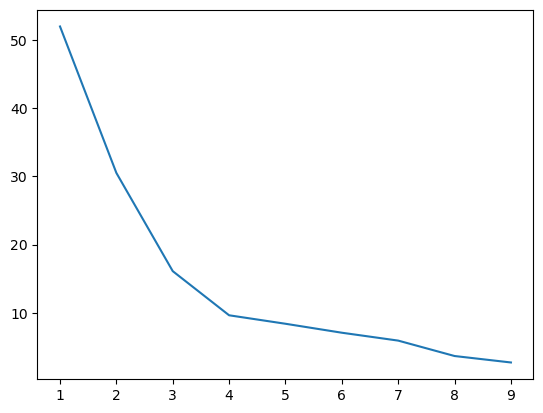

In [14]:
plt.plot(index, sse)
plt.show()
#Menampilkan plot SSE untuk memilih jumlah cluster yang tepat

# MEMBUAT MODEL

In [18]:
kmeans = KMeans (n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(x_scaled)
#Melakukan KMeans clustering dengan jumlah cluster 

C:\Users\dwihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

# MELIHAT CLUSTER PUSAT 

In [16]:
kmeans.cluster_centers_
#Menampilkan pusat cluster

array([[ 0.69251724, -0.37373918],
       [-0.92760327, -0.06873529],
       [ 1.41051619,  2.65484681]])

# VISUALISASI PERSEBARAN DATA SETELAH CLUSTERING

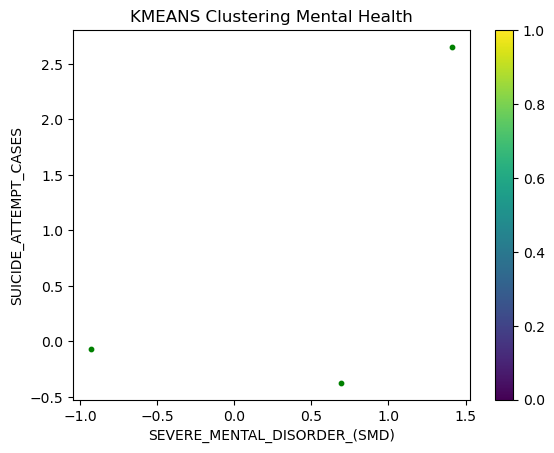

In [19]:
# output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_) #DATANYA
# Menampilkan scatter plot hasil clustering dengan pusat cluster (centroid)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="green", s=10) #centroid
plt.title("KMEANS Clustering Mental Health")
plt.xlabel("SEVERE_MENTAL_DISORDER_(SMD)")
plt.ylabel("SUICIDE_ATTEMPT_CASES")
plt.colorbar()
plt.show()
#menampilkan bar skala warna

# EVALUASI MODEL

In [104]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)
#Menghitung nilai Davies-Bouldin untuk mengevaluasi kualitas clustering

0.6740273281023863